In [51]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from matplotlib.colors import ListedColormap

In [52]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

In [53]:
X.shape,y.shape

((1000, 2), (1000,))

In [54]:
pd.DataFrame(X)

,0,1
0,-1.205500,1.452011
1,0.707998,-1.177302
2,-0.738421,-1.248206
3,-0.868885,0.769620
4,2.534338,-0.839355
...,...,...
995,0.172208,1.392556
996,0.790345,-0.500801
997,1.025194,0.960327
998,-0.957477,0.867475


<AxesSubplot: xlabel='0', ylabel='1'>

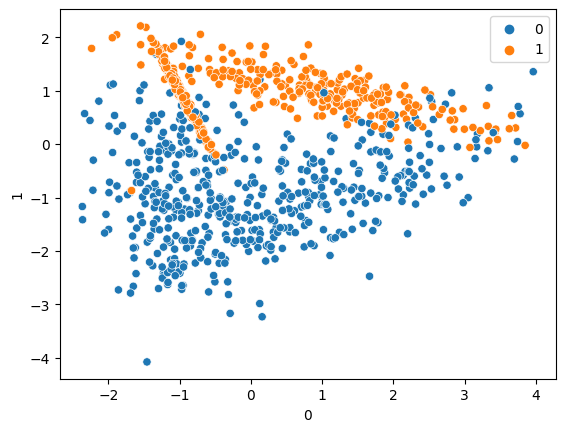

In [55]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

accuracy_score(y_pred,y_test)

0.9366666666666666

In [58]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       140
           1       0.94      0.94      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

[[130  10]
 [  9 151]]
0.9366666666666666


# Hyperparameter tunning 

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
para_grid = {'C': [0.1,1,10,12,15,20],
             "gamma":[1,0.1,0.01,2,5,10],
            'kernel':['linear']          
                }


gsc = GridSearchCV(SVC(),param_grid=para_grid,refit=True,verbose=3,cv=5)

gsc.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.864 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.914 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.936 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.864 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.914 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.936 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.864 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 12, 15, 20],
                         'gamma': [1, 0.1, 0.01, 2, 5, 10],
                         'kernel': ['linear']},
             verbose=3)

In [61]:
gsc.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [62]:
svc = SVC(C=0.1,gamma=1,kernel='linear')

In [63]:
svc.fit(X_train,y_train)
y_pred  = svc.predict(X_test)

accuracy_score(y_test,y_pred)

0.9366666666666666

In [64]:
print(confusion_matrix(y_pred,y_test))

print(classification_report(y_pred,y_test))

[[130   9]
 [ 10 151]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       139
           1       0.94      0.94      0.94       161

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [65]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


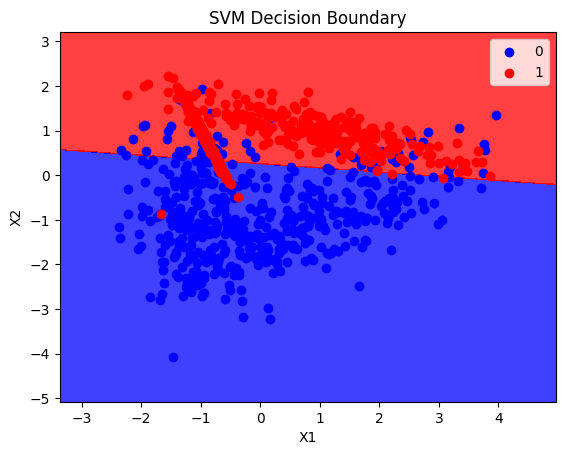

In [66]:

plot_decision_boundary(X, y, svc)